# **Assignment 4** - Introduction to Machine Learning: Signal, Image, and Volume Processing
#### **Author**: Shakthi Visagan
#### **Purpose**: Introduction to image processing

Machine learning and most algorithmic enterprises have one goal: extract the signal from the noise. In this assignment, we'll cover what the signal and the noise looks like in data, and introduce some tools to manipulate and learn about the data. These tools will ultimately build the fundamental operational units used in neural networks.

---

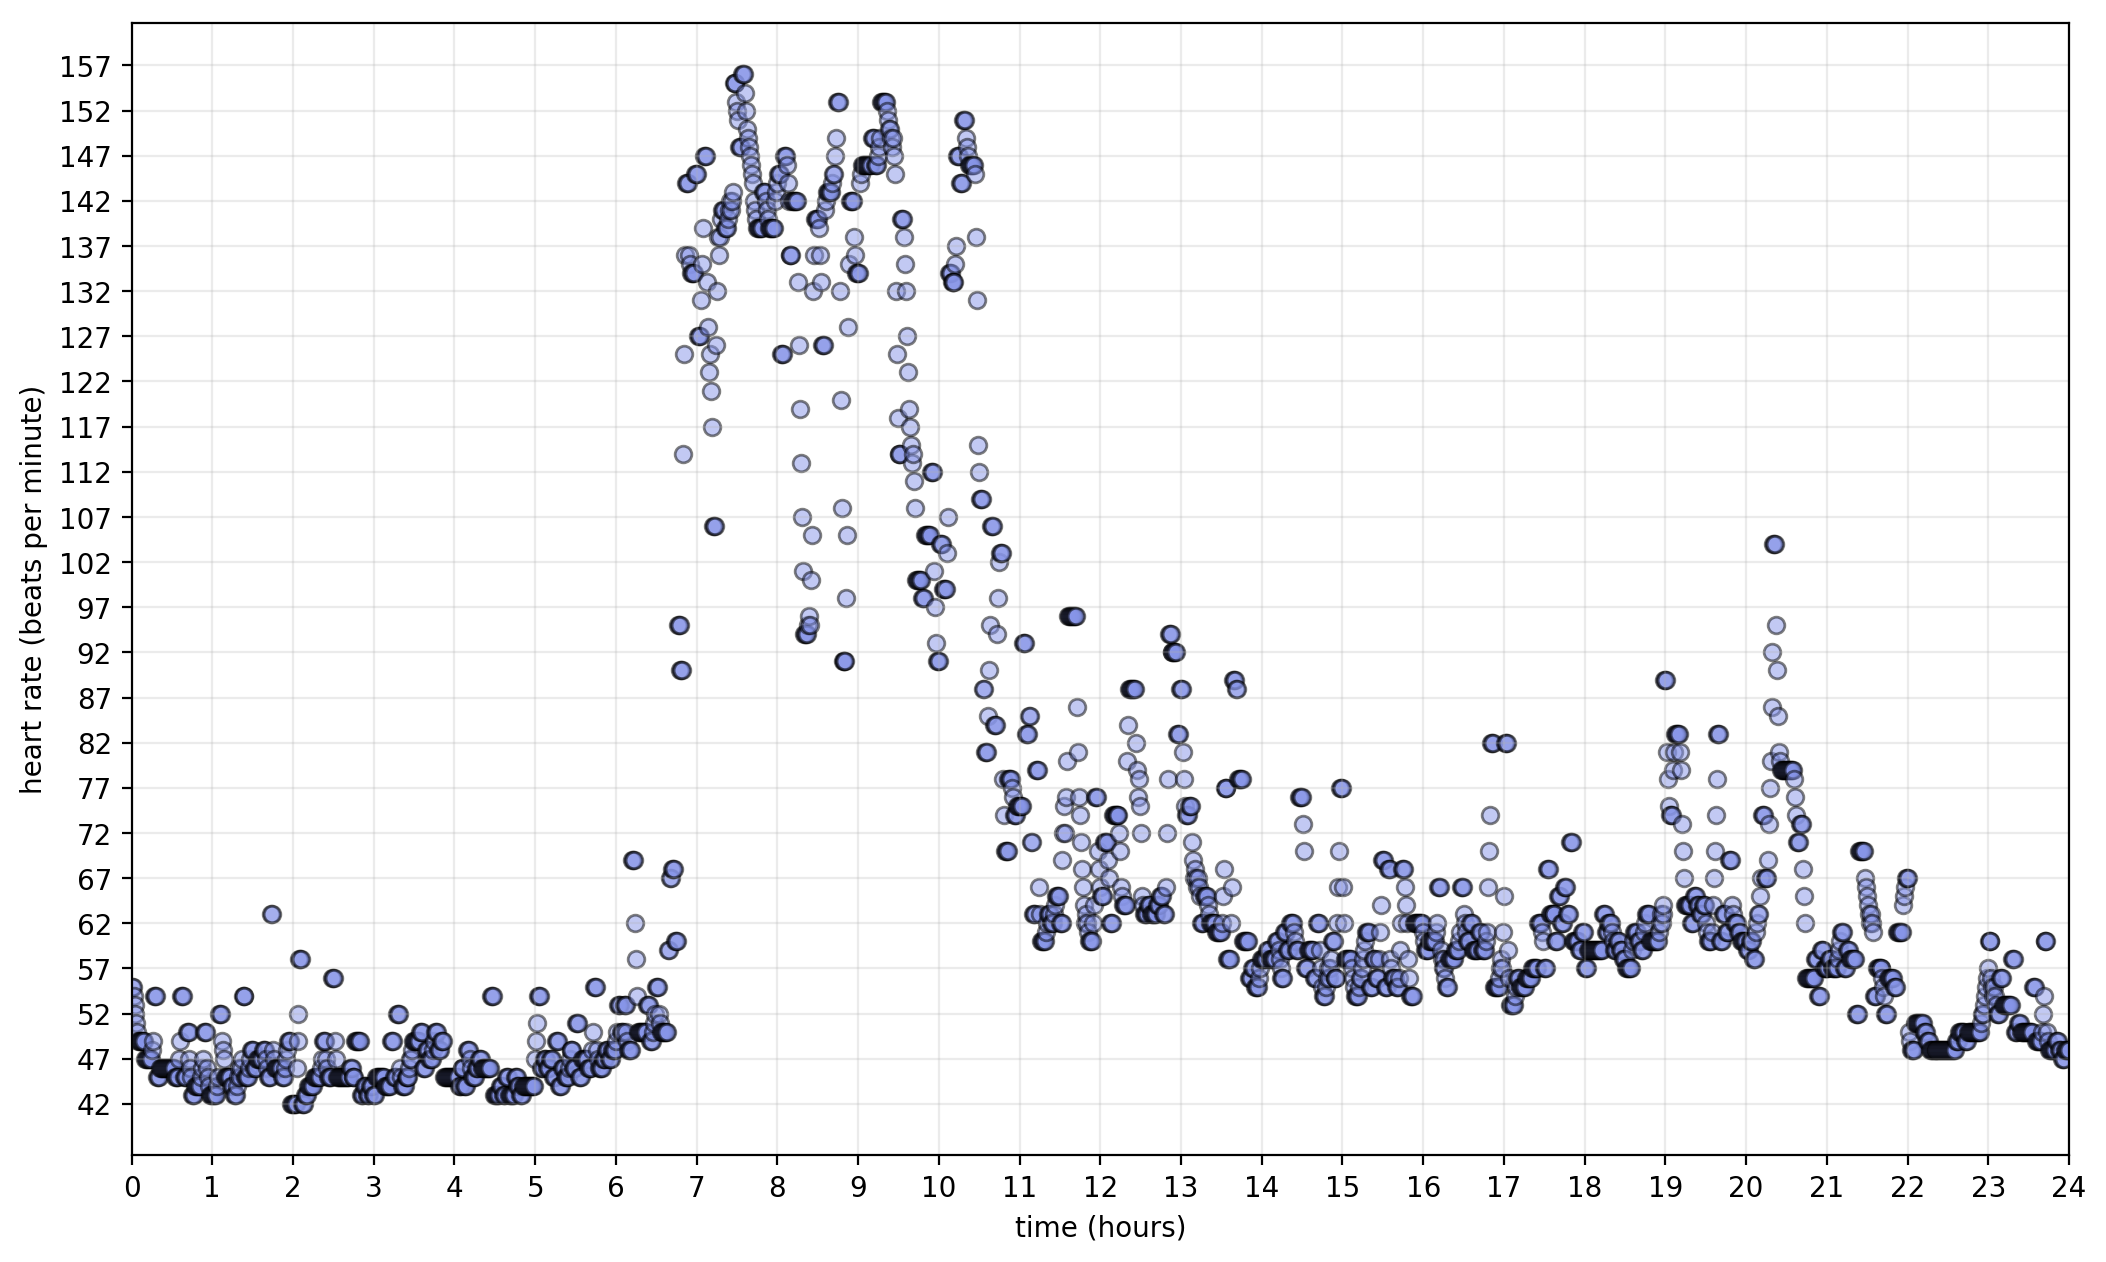

In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_reader = csv.reader(open('data/data1_HR.csv'))
Y = np.expand_dims(np.squeeze(np.asarray(list(csv_reader), dtype=int)), axis=1)
X = np.expand_dims(np.linspace(start=0, stop=24, num=len(Y)), axis=1)
plt.figure(1, figsize=(12.5, 7.5), dpi=200)

plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')

plt.show()

(1a) What is the time resolution of this data? Your answer should be in units of number of data points per unit time.

Write your code and answers as comments below.

In [7]:
print(len(Y)/24)
# 82.25 data points/hour
print(len(Y)/(24*60))
# 1.3 data points/min

82.25
1.3708333333333333


(1b) Plot a histogram of the data so we can see what the distribution of heart rate values are. Use `bins=100` as an argument for your plotting function from `matplotlib.pyplot`. Is this a monomodal, bimodal, or trimodal distribution? Look up what these terms mean if you are unsure of their definition.

Write your code and answers as comments below. Show your plot as well.

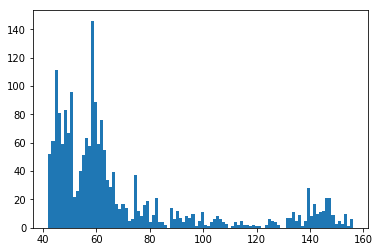

In [8]:
plt.hist(Y,bins=100)
plt.show()
# possibly bimodal or trimodal

(1c) Review. Plot a 5th-order polynomial to this data. Does a polynomial regression even make sense here? Is this an appropriate model for the data? Most of the plotting code is done for you, just change the line that plots the linear regression line.

Write your code and answers as comments below. Show your plot as well.

In [9]:
m = len(X)
Y_vec = Y
# create the matrix for X using numpy
# recall that X should be of shape (m,6)
# that is, it should have m rows
# and 6 columns
# the first column should be all 1s
# the second column should be x
# the third column should be the square of x
# the fourth column should be the cube of x
# the fifth column should be the fourth power of x
# the sixth column should be the fifth power of x
### Write code below ###
X_arr = np.hstack((np.ones((m,1)),X,X**2,X**3,X**4,X**5))
### Write code above ###
assert X_arr.shape[0] == m
assert X_arr.shape[1] == 6
assert np.allclose(X_arr[:,0],np.ones((m)))
assert np.allclose(X_arr[:,1], np.squeeze(X))


# transposing a numpy array is extremely easy
# taking matrix multiplication is also straight-
# forward with numpy
XTX = np.matmul(X_arr.T,X_arr)
XTY = np.matmul(X_arr.T,Y_vec)


# use np.linalg.solve to solve (X.T*X)*betas=(X.T*Y)
### Write code below ###
betas = np.linalg.solve(XTX,XTY)
### Write code above ###

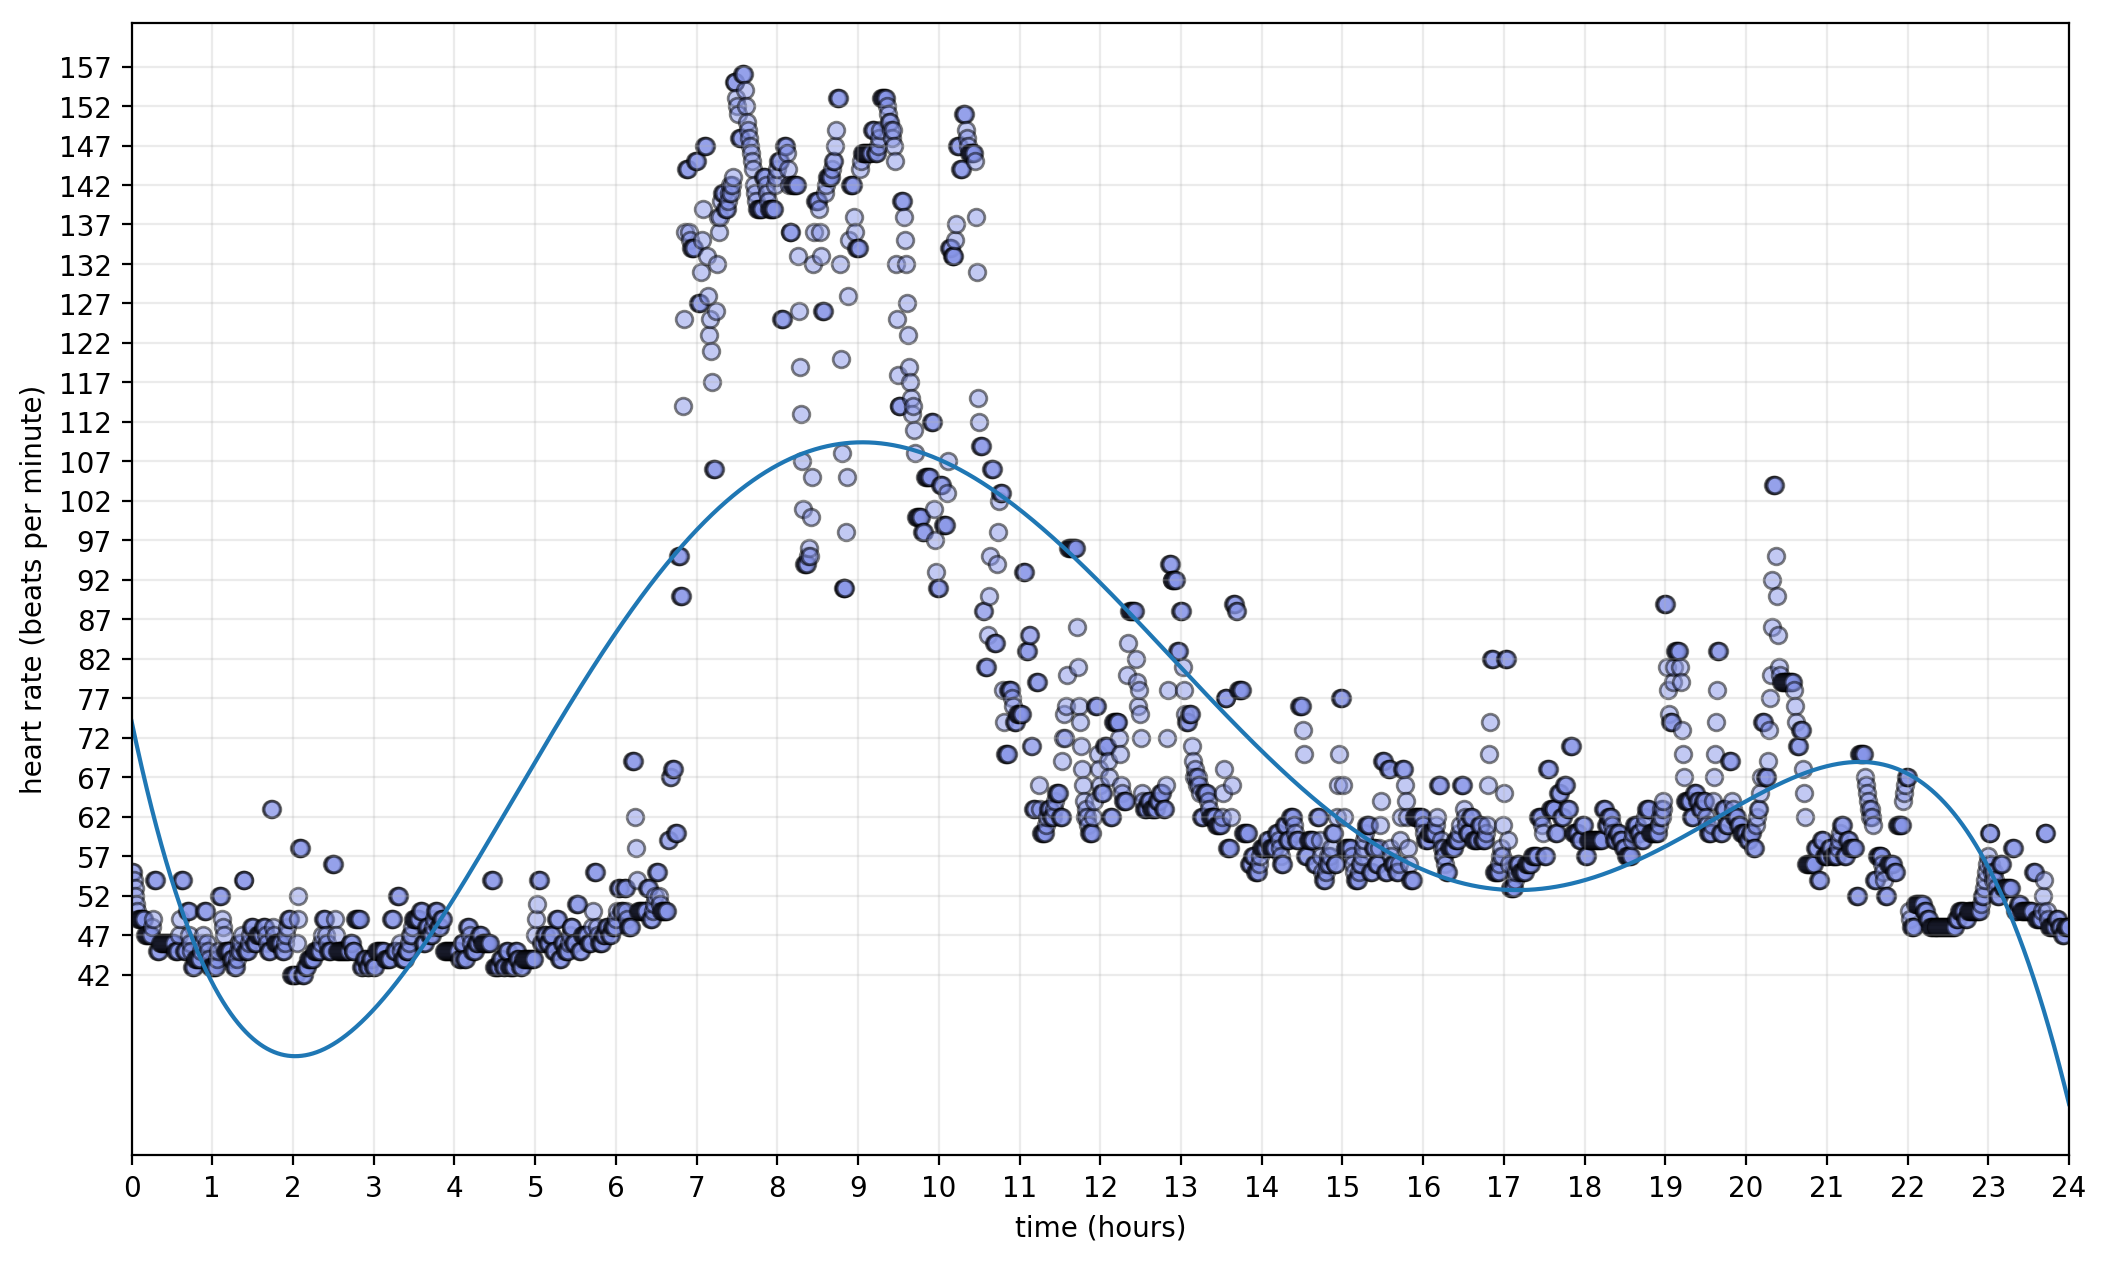

In [13]:
plt.figure(2, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=0, stop=24, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X,betas[0]+betas[1]*tmp_X+betas[2]*tmp_X**2+betas[3]*tmp_X**3+betas[4]*tmp_X**4+betas[5]*tmp_X**5)
### Don't edit the code below, only add the polynomial regression plotting line below ###
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1d) Run the following code below and add the line you used above to plot the polynomial regresssion line. All I've done is extend the $x$-values that the regression takes beyond what our polynomial regression is trained on. Does the polynomial predict the heart rate at the times before and after the data it trains on? What does this say about the generalizability of the model? Again, is a polynomial regression even a valid model for this problem?

Write your answer as comments below.

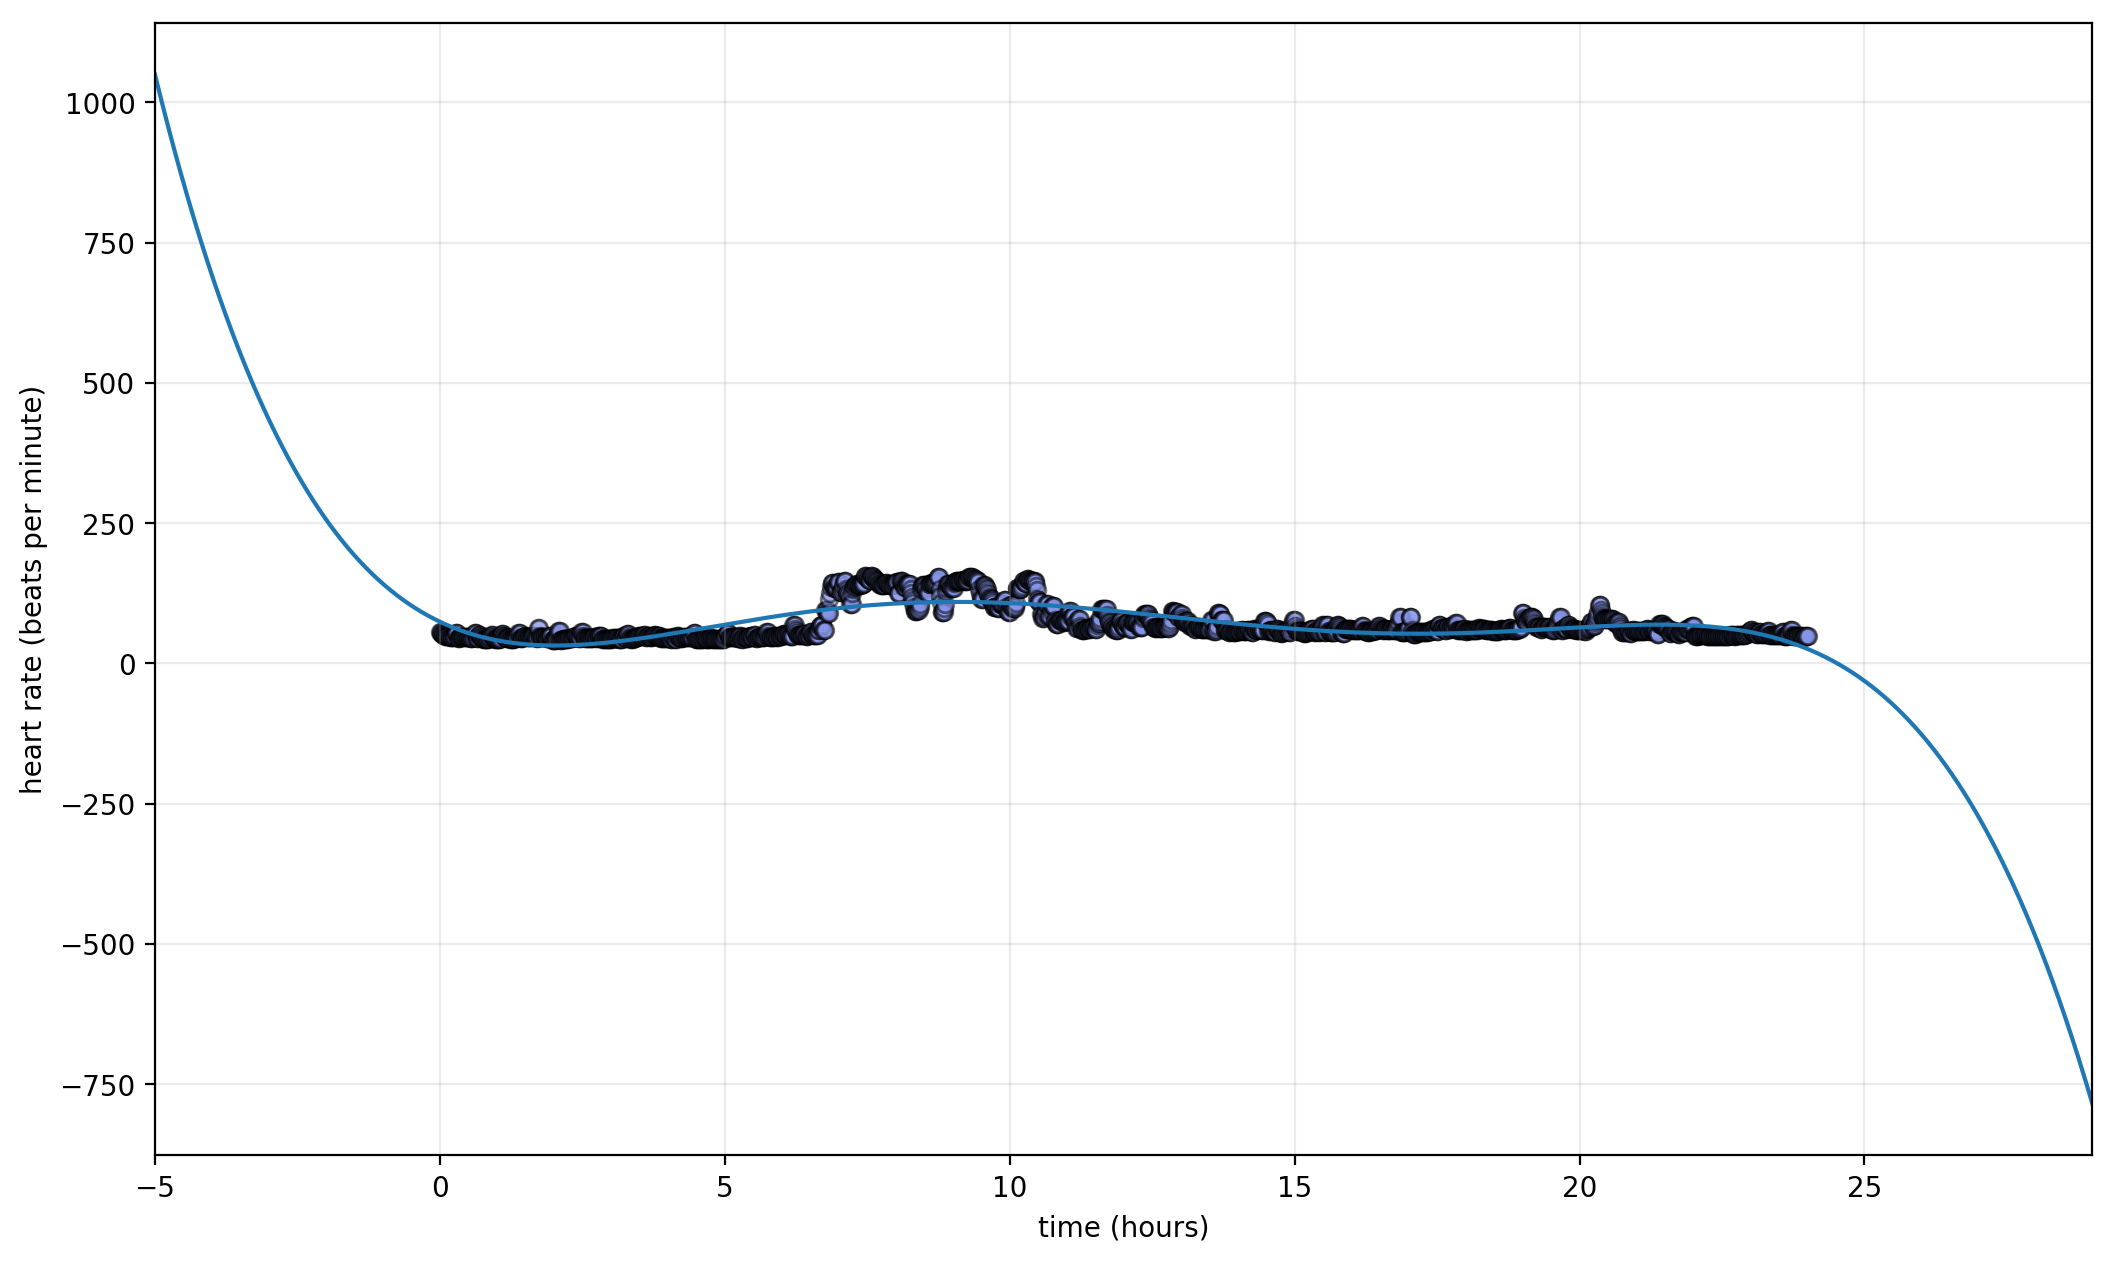

In [14]:
plt.figure(3, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=-5, stop=24+5, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X,betas[0]+betas[1]*tmp_X+betas[2]*tmp_X**2+betas[3]*tmp_X**3+betas[4]*tmp_X**4+betas[5]*tmp_X**5)
### Don't edit the code below, only add the polynomial regression plotting line below ###
plt.grid(True, alpha=0.25)
plt.xlim(np.min(tmp_X), np.max(tmp_X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1e) 